# Исследование объявлений о продаже квартир

В нашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нам нужно проанализировать данные и найти значимые закономерности.

### Откроем файл и посмотрим общую информацию. 

Загрузим датасет и необходимые библиотеки, посмотрим первые десять строк датафрейма.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None) #отключаем ограничение пандас на колонки
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Таблица содержит 23699 строк и 22 колонки. Большинство колонок имеют тип флоат. Много пропусков в колонках is_apartment, balcony, parks_nearest, ponds_nearest.

Визуализируем данные, чтобы подробнее рассмотреть числовые колонки

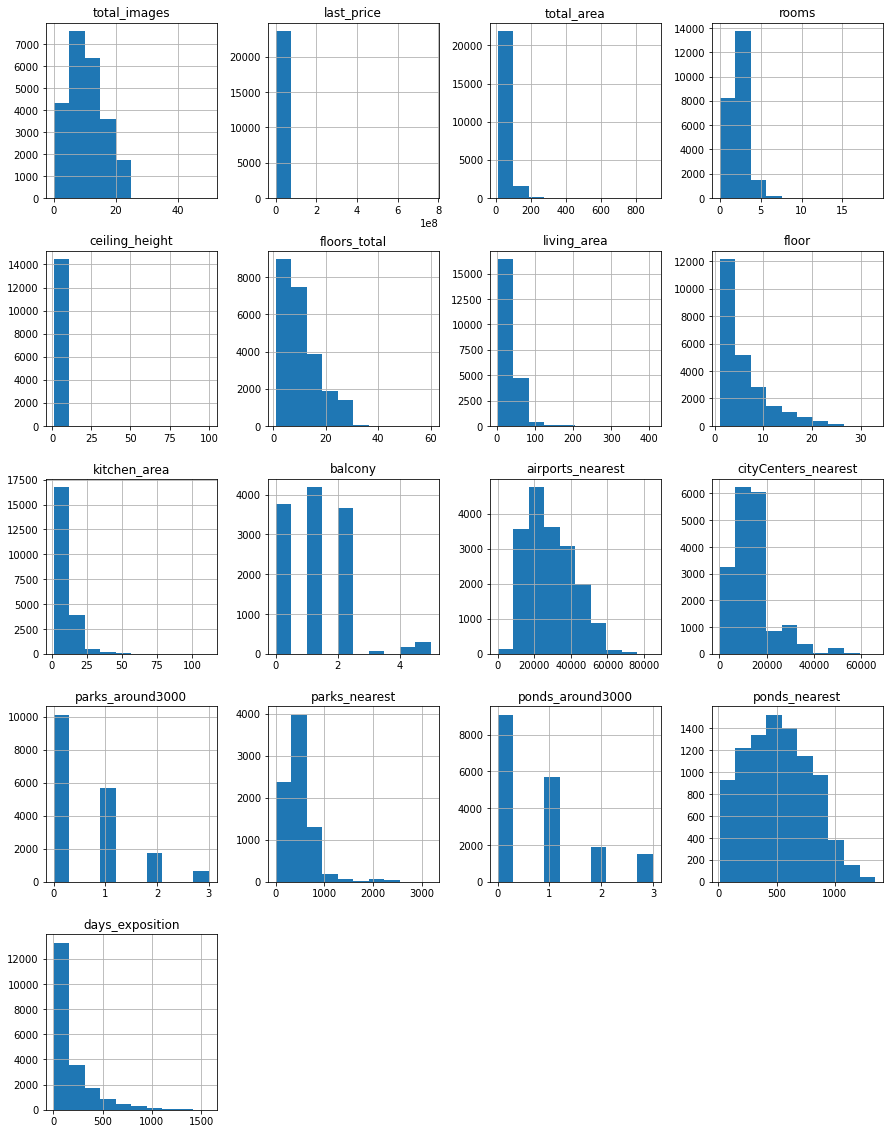

In [ ]:
data.hist(figsize=(15, 20));

Много выбросов практически во всех колонках. 

In [ ]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


Как видно из данной таблицы выбросы довольно сильно отличаются от медианы, и 75%. 

Рассмотрим более подробно в каких колонках есть пропуски. И какой процент пропусков.

In [ ]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [ ]:
pd.DataFrame(round(data.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
total_images,0.000000
last_price,0.000000
total_area,0.000000
first_day_exposition,0.000000
rooms,0.000000
ceiling_height,39.000000
floors_total,0.000000
living_area,8.000000
floor,0.000000
is_apartment,88.000000


В общем, по таблице мы можем сказать, что она далеко не совершенна. Большое число выбросов и пустых значений, с которыми нам придется разобраться на следующем этапе.

### Предобработка данных

Начнем с колонки total_area, у нее есть большой большой выброс. При медиане в 52, максимальное значение составляет 900. Посмотрим распределение квартир с площадью от 200 до 900 м.

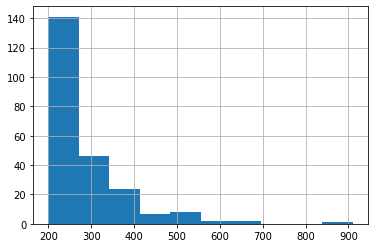

In [ ]:
data['total_area'].hist(range=(200,910));

Как мы видим после 400 идет спад, поэтому ограничим датасет до 400.

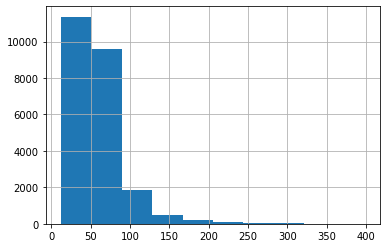

In [ ]:
data=data.loc[data['total_area'] <400]
data['total_area'].hist();

Рассмотрим распределение квартир по количеству комнат. Для более наглядной картины построем гистограмму с 6 комнат и выше.

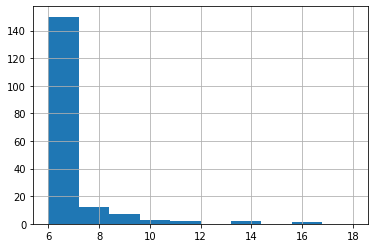

In [ ]:
data['rooms'].hist(range=(6,18));

Как мы видим есть выбросы на 14 и 16 комнат. Так же уберем их из датасета.

In [ ]:
data=data.loc[data['rooms'] <13]

Как мы помним по колонке ceiling_height минимум составляет 1 м, а максимум 100. Необходимо убрать эти выбросы и заменить их на медиану. В этом столбце есть пропуски, так же заменим их на медиану. Скорее всего это опечатки или пользователь перепутали колонки. 

Для начала рассмотри квартиры с высотой потолка до 2 м, потом от 4 до 10. Сделаем необходимые преобразования. 

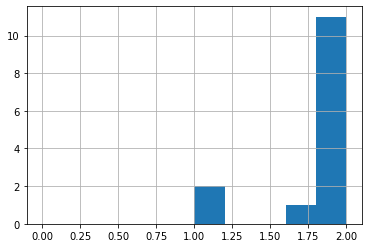

In [ ]:
data['ceiling_height'].hist(range=(0,2));

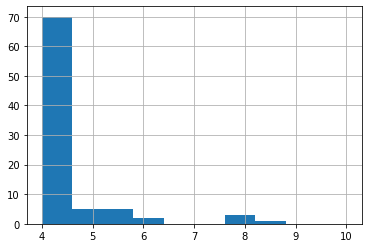

In [ ]:
data['ceiling_height'].hist(range=(4,10));

In [ ]:
data['ceiling_height'].median()

2.65

In [ ]:
data.loc[data['ceiling_height']> 8, 'ceiling_height'] = 2.65
data.loc[data['ceiling_height']< 2, 'ceiling_height'] = 2.65
data['ceiling_height'] = data['ceiling_height'].fillna(2.65)

Рассмотрим жилую площадь.

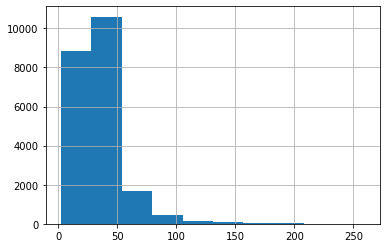

In [ ]:
data['living_area'].hist();

Колонку living_area можно оставить без изменений, так как мы отредактировали total_area. 

Теперь рассмотрим колонку balcony. Пустые значения скорее всего говорят о том, что в данных квартирах нет балкона. Заменим такие значения на 0

In [ ]:
data['balcony'] = data['balcony'].fillna(0)
data['balcony'].value_counts()

0.0    15254
1.0     4192
2.0     3657
5.0      303
4.0      183
3.0       80
Name: balcony, dtype: int64

Теперь рассмотри колонку с площадью кухни. 

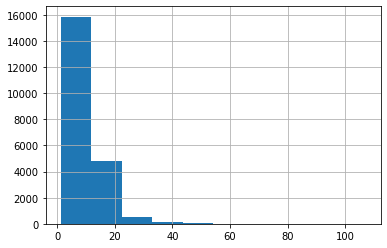

In [ ]:
data['kitchen_area'].hist();

В столбце с площадью кухни есть очень маленькие значения и очень большие. Необходимо посмотреть строки с небольшой и большой площадью кухни.

In [ ]:
data.query('kitchen_area > 40').head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
51,7,45000000.0,161.0,2017-10-17T00:00:00,3,3.20,8.0,38.0,4,NaN,False,False,50.0,0.0,Санкт-Петербург,32537.0,6589.0,0.0,NaN,3.0,99.0,541.0
263,12,39900000.0,140.6,2016-11-19T00:00:00,2,3.50,8.0,39.8,7,NaN,False,False,49.2,4.0,Санкт-Петербург,32537.0,6589.0,0.0,NaN,3.0,99.0,NaN
492,18,95000000.0,216.0,2017-12-05T00:00:00,4,3.00,5.0,86.0,4,NaN,False,False,77.0,0.0,Санкт-Петербург,21740.0,436.0,2.0,138.0,3.0,620.0,14.0
511,7,5950000.0,69.0,2017-12-21T00:00:00,1,2.65,16.0,13.0,12,NaN,False,False,50.0,1.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,56.0


In [ ]:
data.query('kitchen_area < 4').head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
906,15,2600000.0,27.0,2017-07-10T00:00:00,1,2.75,23.0,18.0,18,NaN,False,False,2.0,0.0,Санкт-Петербург,22131.0,17459.0,0.0,NaN,1.0,411.0,10.0
2165,15,3180000.0,25.0,2019-03-21T00:00:00,1,2.50,25.0,17.0,17,NaN,False,False,3.0,0.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,19.0
3078,17,6000000.0,43.0,2018-11-12T00:00:00,2,2.90,4.0,29.3,2,NaN,False,False,3.2,0.0,Санкт-Петербург,22357.0,5247.0,1.0,319.0,2.0,831.0,37.0
3195,17,2690000.0,25.6,2018-02-19T00:00:00,1,2.50,9.0,16.2,7,NaN,False,False,3.8,0.0,Санкт-Петербург,11033.0,11281.0,0.0,NaN,1.0,283.0,99.0
6084,6,770000.0,18.0,2017-10-16T00:00:00,1,2.65,5.0,13.0,4,NaN,False,False,3.0,0.0,Тихвин,NaN,NaN,NaN,NaN,NaN,NaN,90.0


Как мы видим, площадь кухни большая у больших квартир, маленькая кухня у небольших квартир, скорее всего это не опечатка. Если же сложить площадь кухни и жилую площадь то останется небольшая сумма, которая приходится на ванную комнату. Так же, возможно, некоторые собственники вписывают в площадь кухни столовую. А некоторые наоборот вписывают только площадь непосредственно самой кухни.

Рассмотрим колонку locality_name поближе.

In [ ]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

Приведем названия к нижнему регистру и заменим дубликаты.

In [ ]:
data['locality_name'] = data['locality_name'].str.lower()

In [ ]:
data['locality_name'] = data['locality_name'].str.replace('посёлок','поселок')
data['locality_name'] = data['locality_name'].str.replace('мурино','мурино')
data['locality_name'] = data['locality_name'].str.replace('кудрово','кудрово')
data['locality_name'] = data['locality_name'].str.replace('фёдоровское','фёдоровское')
data['locality_name'] = data['locality_name'].str.replace('лебяжье','лебяжье')
data['locality_name'] = data['locality_name'].str.replace('кингисепп','кингисепп')

Пропущенные значения в колонке is_apartment это скорее всего не аппартаменты, заменим пропущенные значения на фолз.

In [ ]:
data['is_apartment'] = data['is_apartment'].fillna(False) 

Обработаем колоннку со временем, приведем ее к удобному формату.

In [ ]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,False,False,25.0,0.0,санкт-петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,18.6,1,False,False,False,11.0,2.0,поселок шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.3,4,False,False,False,8.3,0.0,санкт-петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24,3,2.65,14.0,NaN,9,False,False,False,NaN,0.0,санкт-петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,False,False,41.0,0.0,санкт-петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Заменим пустые значения в колонках parks_around3000 и ponds_around3000. Скорее всего пустые значения обозначают ноль в этих колонках.

In [ ]:
data['parks_around3000'] = data['parks_around3000'].fillna(0)
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)

Рассмотрим цены на квартиры.

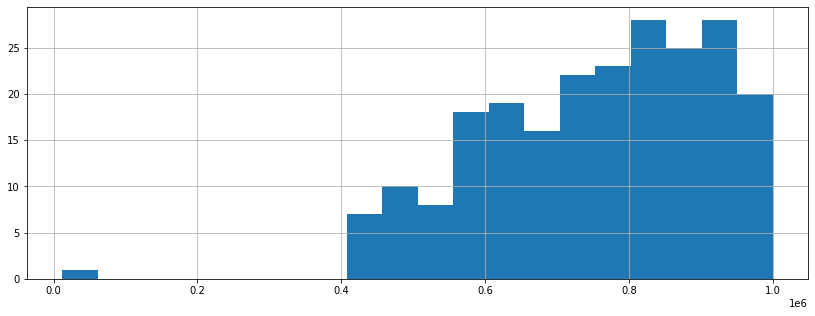

In [ ]:
data.query('last_price < 1000000')['last_price'].hist(figsize=(14,5), bins=20);

Как мы видим у нас есть совсем маленькая цена. Посмотрим что это за строка.

In [ ]:
data.query('last_price < 400000')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
8793,7,12190.0,109.0,2019-03-20,2,2.75,25.0,32.0,25,False,False,False,40.5,0.0,санкт-петербург,36421.0,9176.0,1.0,805.0,0.0,NaN,8.0


Общая площадь 109, 2 комнаты, квартира в Санк-Петербурге. Явно продавец забыл дописать два ноля. Сделаем это за него.

In [ ]:
data.loc[8793,'last_price']=1219000.0

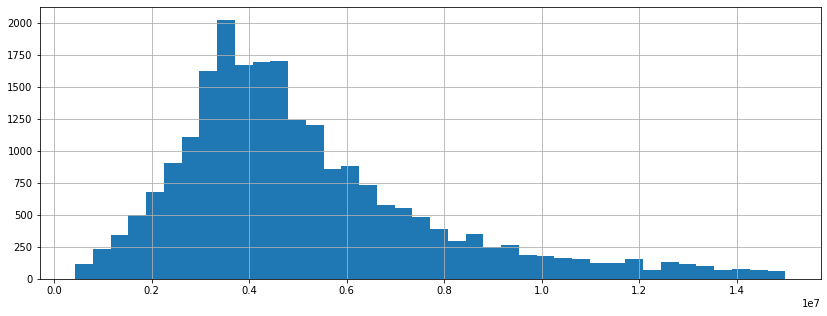

In [ ]:
data.query('last_price < 15000000')['last_price'].hist(figsize=(14,5), bins=40);

Ограничим так же максимальную стоимость до 15 млн

In [ ]:
data=data.loc[data['last_price'] <15000000]

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22454 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          22454 non-null  int64         
 1   last_price            22454 non-null  float64       
 2   total_area            22454 non-null  float64       
 3   first_day_exposition  22454 non-null  datetime64[ns]
 4   rooms                 22454 non-null  int64         
 5   ceiling_height        22454 non-null  float64       
 6   floors_total          22373 non-null  float64       
 7   living_area           20696 non-null  float64       
 8   floor                 22454 non-null  int64         
 9   is_apartment          22454 non-null  bool          
 10  studio                22454 non-null  bool          
 11  open_plan             22454 non-null  bool          
 12  kitchen_area          20303 non-null  float64       
 13  balcony         

Столбец floors_total имеет 86 пропусков, что составляет менее 5%, удалим пустые значения и приведем его к целочисленному типу

In [ ]:
data = data.dropna(subset=['floors_total'])

In [ ]:
data['floors_total'] = data['floors_total'].astype('int')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22373 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          22373 non-null  int64         
 1   last_price            22373 non-null  float64       
 2   total_area            22373 non-null  float64       
 3   first_day_exposition  22373 non-null  datetime64[ns]
 4   rooms                 22373 non-null  int64         
 5   ceiling_height        22373 non-null  float64       
 6   floors_total          22373 non-null  int64         
 7   living_area           20646 non-null  float64       
 8   floor                 22373 non-null  int64         
 9   is_apartment          22373 non-null  bool          
 10  studio                22373 non-null  bool          
 11  open_plan             22373 non-null  bool          
 12  kitchen_area          20267 non-null  float64       
 13  balcony         

Посмотрим и при необходимости удалим явные дубликаты

In [ ]:
data.duplicated().sum()

0

Как мы видим, явных дубликатов нет

Поправим столбцы с некорректными типами данных

In [ ]:
data['balcony'] = data['balcony'].astype('int')
data['parks_around3000'] = data['parks_around3000'].astype('int')
data['ponds_around3000'] = data['ponds_around3000'].astype('int')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22373 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          22373 non-null  int64         
 1   last_price            22373 non-null  float64       
 2   total_area            22373 non-null  float64       
 3   first_day_exposition  22373 non-null  datetime64[ns]
 4   rooms                 22373 non-null  int64         
 5   ceiling_height        22373 non-null  float64       
 6   floors_total          22373 non-null  int64         
 7   living_area           20646 non-null  float64       
 8   floor                 22373 non-null  int64         
 9   is_apartment          22373 non-null  bool          
 10  studio                22373 non-null  bool          
 11  open_plan             22373 non-null  bool          
 12  kitchen_area          20267 non-null  float64       
 13  balcony         

Мы обработали таблицу на сколько это было возможным. Заменили пустые значения и явные ошибки.

### Посчитаем и добавим в таблицу новые столбцы

Посчитаем цену одного квадратного метра и округлим ее до целого числа.

In [ ]:
data['one_square_meter'] = data['last_price']/data['total_area']
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,one_square_meter
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,False,False,25.0,0,санкт-петербург,18863.0,16028.0,1,482.0,2,755.0,NaN,120370.370370
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.6,1,False,False,False,11.0,2,поселок шушары,12817.0,18603.0,0,NaN,0,NaN,81.0,82920.792079
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,False,False,False,8.3,0,санкт-петербург,21741.0,13933.0,1,90.0,2,574.0,558.0,92785.714286
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,False,False,41.0,0,санкт-петербург,31856.0,8098.0,2,112.0,1,48.0,121.0,100000.000000
5,10,2890000.0,30.4,2018-09-10,1,2.65,12,14.4,5,False,False,False,9.1,0,городской поселок янино-1,NaN,NaN,0,NaN,0,NaN,55.0,95065.789474


In [ ]:
data['one_square_meter'] = data['one_square_meter'].astype('int')
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,one_square_meter
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,False,False,25.0,0,санкт-петербург,18863.0,16028.0,1,482.0,2,755.0,NaN,120370
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.6,1,False,False,False,11.0,2,поселок шушары,12817.0,18603.0,0,NaN,0,NaN,81.0,82920
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,False,False,False,8.3,0,санкт-петербург,21741.0,13933.0,1,90.0,2,574.0,558.0,92785
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,False,False,41.0,0,санкт-петербург,31856.0,8098.0,2,112.0,1,48.0,121.0,100000
5,10,2890000.0,30.4,2018-09-10,1,2.65,12,14.4,5,False,False,False,9.1,0,городской поселок янино-1,NaN,NaN,0,NaN,0,NaN,55.0,95065


In [ ]:
data['one_square_meter'].describe()

count     22373.000000
mean      93446.181826
std       30933.430106
min        7962.000000
25%       75208.000000
50%       93378.000000
75%      110898.000000
max      387096.000000
Name: one_square_meter, dtype: float64

Как мы видим, минимальная цена за квадратный метр 7962, максимум 600000 руб. Среднее и медиана примерно равны и составляют 93500.

Теперь обработаем колонки с датой.

In [ ]:
data['day_exposition']= data['first_day_exposition'].dt.weekday
data['month_exposition']=data['first_day_exposition'].dt.month
data['years_exposition']=data['first_day_exposition'].dt.year
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,one_square_meter,day_exposition,month_exposition,years_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,False,False,25.0,0,санкт-петербург,18863.0,16028.0,1,482.0,2,755.0,NaN,120370,3,3,2019
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.6,1,False,False,False,11.0,2,поселок шушары,12817.0,18603.0,0,NaN,0,NaN,81.0,82920,1,12,2018
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,False,False,False,8.3,0,санкт-петербург,21741.0,13933.0,1,90.0,2,574.0,558.0,92785,3,8,2015
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,False,False,41.0,0,санкт-петербург,31856.0,8098.0,2,112.0,1,48.0,121.0,100000,1,6,2018
5,10,2890000.0,30.4,2018-09-10,1,2.65,12,14.4,5,False,False,False,9.1,0,городской поселок янино-1,NaN,NaN,0,NaN,0,NaN,55.0,95065,0,9,2018


Добавим столбец с этажами, где значения — первый, последний, другой.

Создадим функцию, которая в зависимости от количества этаже выдает необходимые нам категории. Применим ее к датасету и посмотрим результат.

In [ ]:
def categorize_floor(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'

In [ ]:
data['group_floor'] = data.apply(categorize_floor, axis=1)

In [ ]:
data['group_floor'].value_counts()

другой       16420
последний     3108
первый        2845
Name: group_floor, dtype: int64

Как мы видим, вся колонка у нас заполнена.

Теперь переведем км в м, в колонке с расстоянием до центра.

In [ ]:
data['cityCenters_nearest'] = (data['cityCenters_nearest']/1000).round()
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,one_square_meter,day_exposition,month_exposition,years_exposition,group_floor
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,False,False,25.0,0,санкт-петербург,18863.0,16.0,1,482.0,2,755.0,NaN,120370,3,3,2019,другой
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.6,1,False,False,False,11.0,2,поселок шушары,12817.0,19.0,0,NaN,0,NaN,81.0,82920,1,12,2018,первый
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,False,False,False,8.3,0,санкт-петербург,21741.0,14.0,1,90.0,2,574.0,558.0,92785,3,8,2015,другой
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,False,False,41.0,0,санкт-петербург,31856.0,8.0,2,112.0,1,48.0,121.0,100000,1,6,2018,другой
5,10,2890000.0,30.4,2018-09-10,1,2.65,12,14.4,5,False,False,False,9.1,0,городской поселок янино-1,NaN,NaN,0,NaN,0,NaN,55.0,95065,0,9,2018,другой


Мы добавили необходимые нам столбцы для дальнейшего анализа, а так же рассмотрели средние цены за один метр квадратный.

### Проведем исследовательский анализ данных

Теперь займемся поиском закономерностей в датасете. Выведем числовое описание данных по датасету и рассмотрим график отдельно по каждому столбцу. 

In [ ]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,one_square_meter,day_exposition,month_exposition,years_exposition
count,22373.000000,2.237300e+04,22373.000000,22373.000000,22373.000000,22373.000000,20646.000000,22373.000000,20267.000000,22373.000000,16867.000000,16882.000000,22373.000000,7180.000000,22373.000000,8200.000000,19565.000000,22373.000000,22373.000000,22373.000000,22373.000000
mean,9.752469,5.141228e+06,55.113961,1.976043,2.681343,10.761766,31.640665,5.882269,9.875554,0.594869,28863.862216,14.676638,0.431547,490.996936,0.548652,528.903049,176.143062,93446.181826,2.571224,6.399097,2017.380637
std,5.587587,2.683140e+06,21.785517,0.946333,0.202930,6.644642,15.023136,4.899572,4.273294,0.950921,12872.240177,8.569739,0.714978,334.211924,0.848171,277.522839,214.901385,30933.430106,1.792042,3.489041,1.026871
min,0.000000,4.300000e+05,12.000000,0.000000,2.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,13.000000,1.000000,7962.000000,0.000000,1.000000,2014.000000
25%,6.000000,3.350000e+06,39.400000,1.000000,2.600000,5.000000,18.300000,2.000000,7.000000,0.000000,18274.000000,10.000000,0.000000,291.000000,0.000000,311.000000,44.000000,75208.000000,1.000000,3.000000,2017.000000
50%,9.000000,4.500000e+06,50.100000,2.000000,2.650000,9.000000,29.800000,4.000000,9.000000,0.000000,26895.000000,13.000000,0.000000,456.000000,0.000000,516.000000,93.000000,93378.000000,3.000000,6.000000,2017.000000
75%,14.000000,6.300000e+06,65.600000,3.000000,2.700000,16.000000,40.400000,8.000000,11.285000,1.000000,37438.500000,17.000000,1.000000,613.250000,1.000000,739.000000,224.000000,110898.000000,4.000000,10.000000,2018.000000
max,50.000000,1.500000e+07,320.000000,7.000000,8.000000,60.000000,190.000000,33.000000,100.700000,5.000000,84869.000000,66.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000,387096.000000,6.000000,12.000000,2019.000000


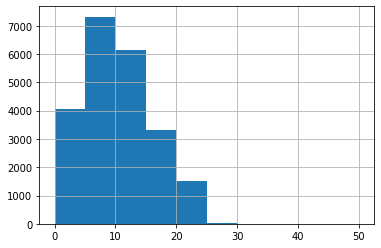

In [ ]:
data['total_images'].hist();

По количеству изображений в среднем люди выкладывают 9 фотографий. В редких случаях люди делают больше 20 фото.

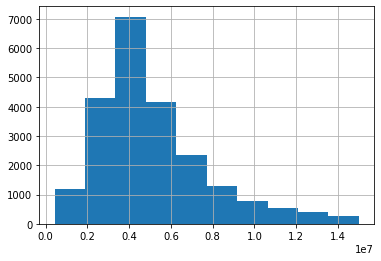

In [ ]:
data['last_price'].hist();

Медианная цена на квартиры составляет 4,5 млн, средняя немного выше, примерно 5,1 млн.

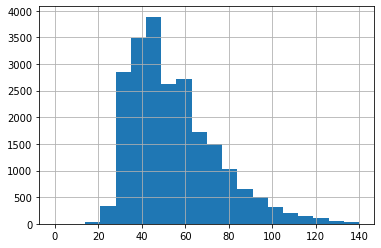

In [ ]:
data['total_area'].hist(range=(0,140), bins=20);

Наибольшее количество объявлений с площадь квартир в среднем 56 метров квадратных. Далее мы наблюдаем медленный спад.

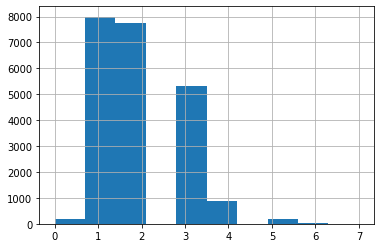

In [ ]:
data['rooms'].hist();

Наибольшее количество объявлений с продажей однокомнатных квартир, с небольшим отставанием идут двушки, потом трешки. Это топ три популярных квартир по количеству комнмат.

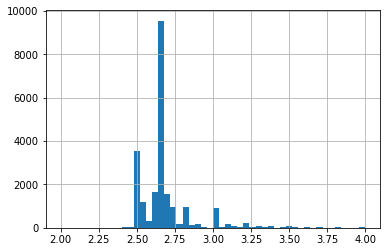

In [ ]:
data['ceiling_height'].hist(range=(2,4), bins=50);

Потолки в среднем составляют 2.65 м, следом идут квартиры с потолком в 2.5 м. 

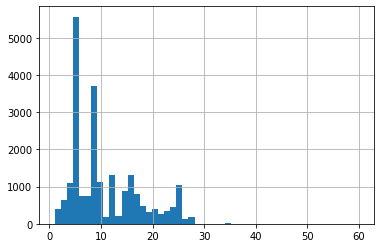

In [ ]:
data['floors_total'].hist(bins=(50));

По графику первый пик приходится на пятиэтажки, что составляет 25% датасета, второй пик на девятиэтажки, что является медианным значением. Остальные пики уже не так сильно выделяются и находятся на одном уровне. Так же видим очень высокие дома с более чем 30 этажами.

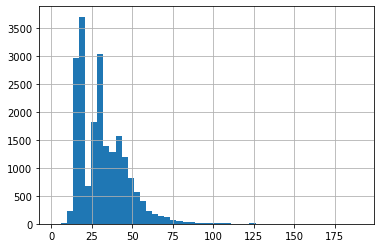

In [ ]:
data['living_area'].hist(bins=(50));

Медиана приходится на 29.8 метров квадратных, мы видим второй по величине пик на графике. Самый большой пик приходится примерно на 23 метра квадратных. 

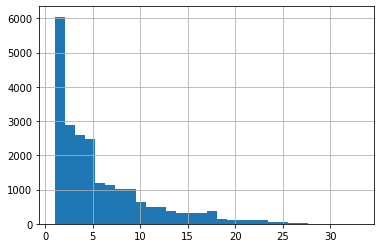

In [ ]:
data['floor'].hist(bins=30);

Пик приходится на квартиры с первым-вторым этажами. Дальше мы наблюдаем постепенный спад. Медиана проходит по 4 этажу, а максимальный этаж 33.

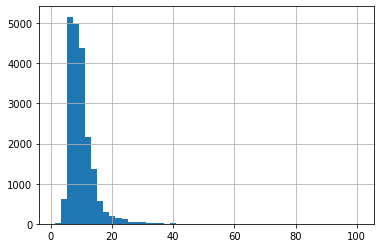

In [ ]:
data['kitchen_area'].hist(bins=50);

Медиана находится на 9 метрах квадратных, примерно в области пика, после которого наблюдается медленный спад.

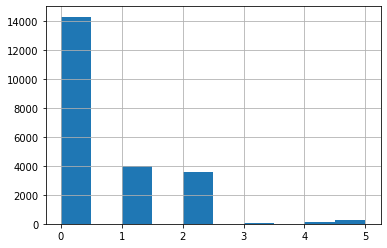

In [ ]:
data['balcony'].hist();

Большинство квартир не имеют балконов, потом идут квартиры с одним балконом и немного отстают квартиры с двумя.

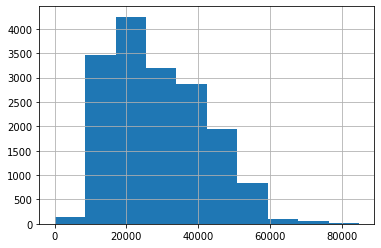

In [ ]:
data['airports_nearest'].hist();

Квартиры в которых указана удаленность от аэропорта в среднем находятся от него почти на 27 км. Пиковое значение приходится на 20 км.

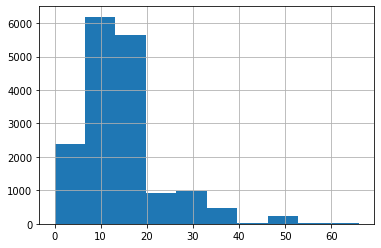

In [ ]:
data['cityCenters_nearest'].hist();

Среди тех кто указали удаленность от центра пик приходится на 10км. Медианная удаленность от центра города составляет 13 км, но в нашем датасете есть и квартиры, которые находятся непосредственно в центре. 

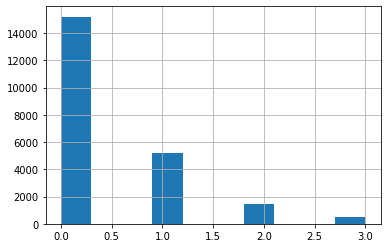

In [ ]:
data['parks_around3000'].hist();

Зачатую квартиры в Ленинградской области и, непосредственно, в Санкт-Петербурге обделены парками в радиусе 3 км, а максимум по наличию парков в указанном радиусе составляет 3 штуки.

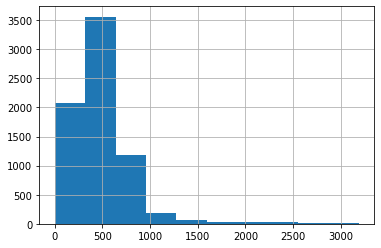

In [ ]:
data['parks_nearest'].hist();

Среди тех, кто указал удаленность от парка в среднем идти до него чуть меньше пол километра. 

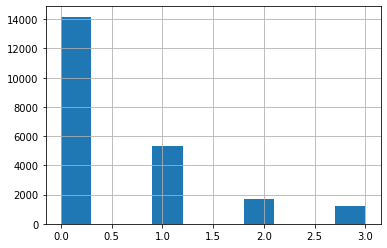

In [ ]:
data['ponds_around3000'].hist();

Водоемы так же редко встречаются в радиусе 3 км как и парки. 

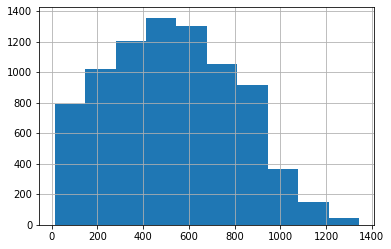

In [ ]:
data['ponds_nearest'].hist();

Идти до водоема максимум около 1,3 км, в то время как до ближайшего парка почти 3,2 км. Медиана проходит по 500 метрам, в этом месте мы наблюдаем пик на графике.

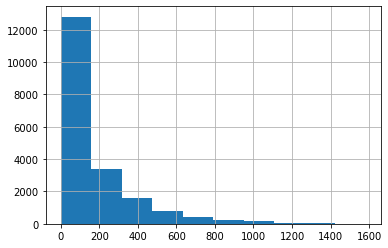

In [ ]:
data['days_exposition'].hist();

Медианно квартиры продавались в течении 94 дней, но четверть квартир были проданы за значительно меньшее количество времени, а именно 44 дня, 75% продавали свою квартиру в среднем за 227 дней. 

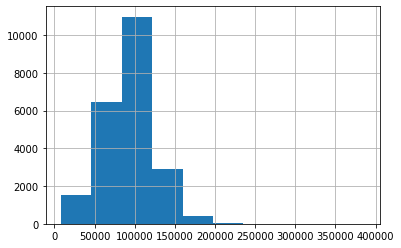

In [ ]:
data['one_square_meter'].hist();

Медиана проходит по величине в 93378 руб. На графике мы видим пик в этой области.

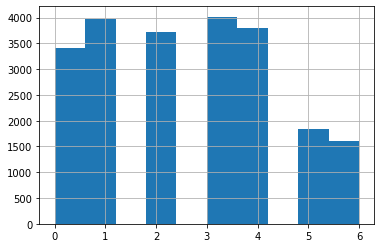

In [ ]:
data['day_exposition'].hist();

По дням активно выкладывают квартиры в будни, нежели чем в выходные.

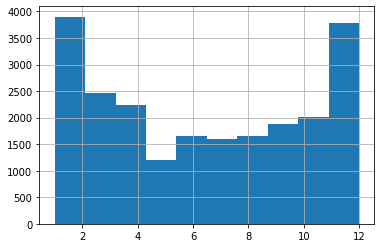

In [ ]:
data['month_exposition'].hist();

В середине года отмечается спад по выкладыванию объявлений, вначале и конце года мы, наоборот, видим пики.

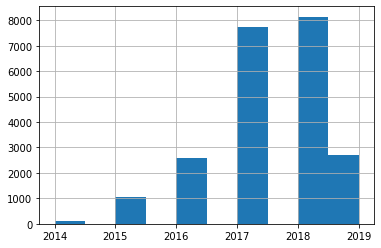

In [ ]:
data['years_exposition'].hist();

В целом по рынку недвижимости мы наблюдали рост до 2018 года, объявлений в 2019 году значительно, так как датасет содержит его не полностью. 

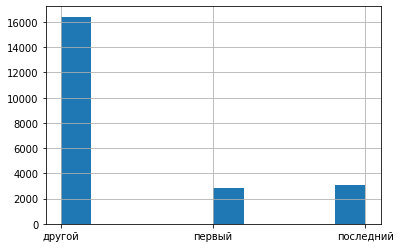

In [ ]:
data['group_floor'].hist();

Наибольшее количество объявлений в категории "другой", что неудивительно, потому что квартир на первом и последнем этажах в принципе меньше.

Теперь рассмотрим зависимость цены от разных показателей.

Коэффициент кореляции равен 0.742879505313769


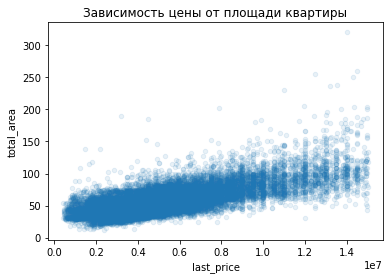

In [ ]:
data.plot(x='last_price', y='total_area', kind='scatter', alpha=0.1, title='Зависимость цены от площади квартиры');
print('Коэффициент кореляции равен', data['last_price'].corr(data['total_area']))

Мы наблюдаем довольно большой коэффициент корреляции, который составляет 0,742, что весьма ожидаемо. 

Коэффициент кореляции равен 0.6345904280030169


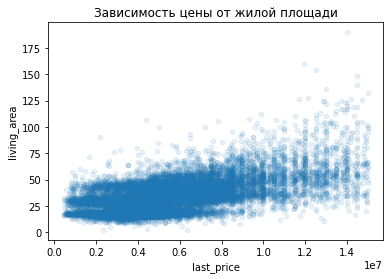

In [ ]:
data.plot(x='last_price', y='living_area', kind='scatter', alpha=0.1, title='Зависимость цены от жилой площади');
print('Коэффициент кореляции равен', data['last_price'].corr(data['living_area']))

Примерно одинаковая корреляция прослеживается как для общей площади, так и для жилой, что так же не вызывает какого либо удивления.

Коэффициент кореляции равен 0.532035326493206


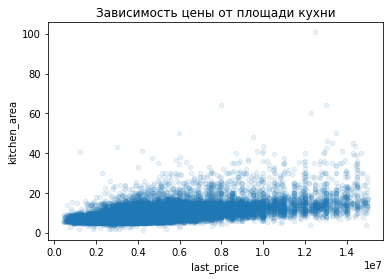

In [ ]:
data.plot(x='last_price', y='kitchen_area', kind='scatter', alpha=0.1, title='Зависимость цены от площади кухни');
print('Коэффициент кореляции равен', data['last_price'].corr(data['kitchen_area']))

Коэффициент корреляции с площадью кухни меньше, чем от жилой площади, но все же составляет 0,532.

Коэффициент кореляции равен 0.49069342056692344


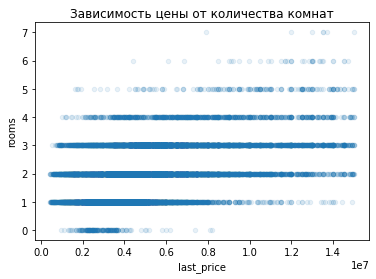

In [ ]:
data.plot(x='last_price', y='rooms', kind='scatter', alpha=0.1, title='Зависимость цены от количества комнат');
print('Коэффициент кореляции равен', data['last_price'].corr(data['rooms']))

Количество комнат не так сильно влияет на цену квартиры как общая площадь, но тем не менее коэффициент корреляции составляет 0,49.

Коэффициент кореляции равен -0.016233794045392


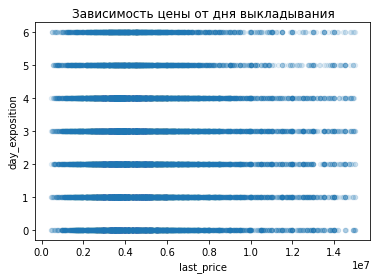

In [ ]:
data.plot(x='last_price', y='day_exposition', kind='scatter', alpha=0.1, title='Зависимость цены от дня выкладывания');
print('Коэффициент кореляции равен', data['last_price'].corr(data['day_exposition']))

День не влияет на цену, что неудивительно.

Коэффициент кореляции равен 0.004303927480821996


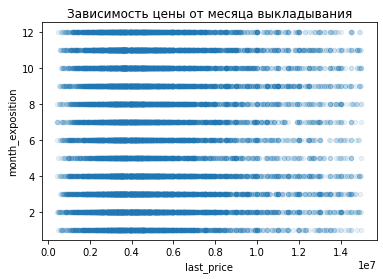

In [ ]:
data.plot(x='last_price', y='month_exposition', kind='scatter', alpha=0.1, title='Зависимость цены от месяца выкладывания');
print('Коэффициент кореляции равен', data['last_price'].corr(data['month_exposition']))

Месяц выкладывания так же не влияет на цену. Рынок недвижимости весьма стабилен.

Коэффициент кореляции равен -0.01624106117568296


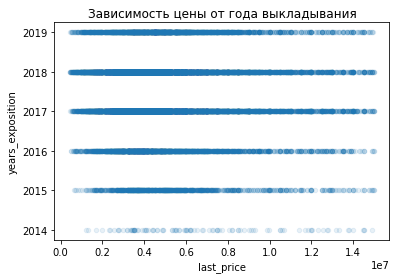

In [ ]:
data.plot(x='last_price', y='years_exposition', kind='scatter', alpha=0.1, title='Зависимость цены от года выкладывания');
print('Коэффициент кореляции равен', data['last_price'].corr(data['years_exposition']))

Цена не зависит от года выкладывания. Так же мы можем увидеть что со временем цвет становится более насыщеным, что говорит в целом о росте количества квартир с каждым годом.

In [ ]:
data['last_price'].corr(data['total_area'])

0.742879505313769

Зачастую на самых верхних этаж самые дорогие квартиры, посмотри так ли это на самом деле.

<AxesSubplot:xlabel='group_floor'>

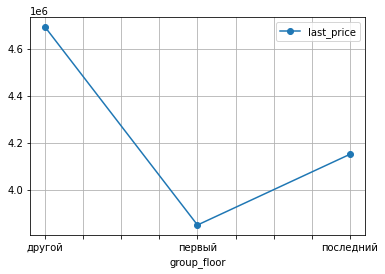

In [ ]:
data.pivot_table(index='group_floor', values='last_price',aggfunc='median').plot(grid=True, style='o-')

Как мы видим, в среднем последний этаж дороже только первого. А в целом, больше ценятся квартиры на других этажах.

Санкт-Петербург является самым большим городом в датасете, и скорее всего, самым дорогим. Выведем топ 10 городов из датасета с самой дорогой ценой за метр квадратный метр.

In [ ]:
top_10= data.pivot_table(index='locality_name', values='total_images', aggfunc='count') #создаем сводную тадлицу 
top_10.sort_values(by='total_images', ascending=False) #сортируем ее по уменьшению количества объявлений
top_10['mean_one_square_meter'] = data.pivot_table(index='locality_name', values='one_square_meter', aggfunc='mean')#создаем колонку с ценой 

top_10.sort_values(by='total_images', ascending=False).head(10)

,total_images,mean_one_square_meter
locality_name,,
санкт-петербург,14454,107100.833057
поселок мурино,552,85629.110507
поселок шушары,439,78550.883827
всеволожск,397,67213.785894
пушкин,349,100978.699140
колпино,337,75332.866469
поселок парголово,327,90175.489297
гатчина,307,68745.693811
деревня кудрово,299,92473.086957


Как мы видим, Санкт-Петербург оправдал наши ожидания, но Пушкин от него не отстает. В среднем же цена квадратного метра в остальных городах ниже, а в Выборге почти в два раза.

Посчитаем среднюю цену каждого километра от центра Санк-Петербурга.

In [ ]:
spb_data =data.loc[data['locality_name'] == 'санкт-петербург']
spb_data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,one_square_meter,day_exposition,month_exposition,years_exposition,group_floor
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,False,False,25.0,0,санкт-петербург,18863.0,16.0,1,482.0,2,755.0,NaN,120370,3,3,2019,другой
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,False,False,False,8.3,0,санкт-петербург,21741.0,14.0,1,90.0,2,574.0,558.0,92785,3,8,2015,другой
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,False,False,41.0,0,санкт-петербург,31856.0,8.0,2,112.0,1,48.0,121.0,100000,1,6,2018,другой
7,5,7915000.0,71.6,2019-04-18,2,2.65,24,NaN,22,False,False,False,18.9,2,санкт-петербург,23982.0,12.0,0,NaN,0,NaN,NaN,110544,3,4,2019,другой
9,18,5400000.0,61.0,2017-02-26,3,2.50,9,43.6,7,False,False,False,6.5,2,санкт-петербург,50898.0,15.0,0,NaN,0,NaN,289.0,88524,6,2,2017,другой


Удалим строки, в которых пропущены значения.

In [ ]:
spb_data=spb_data.dropna(subset=['cityCenters_nearest'])

In [ ]:
spb_price_km= spb_data['last_price'].sum()/spb_data['cityCenters_nearest'].sum()
print('Средняя стоимость каждого километра в Санкт-Петербурге равна',int(spb_price_km))

Средняя стоимость каждого километра в Санкт-Петербурге равна 505457


Таким образом, за каждый километр ближе к центру придется доплатить чуть больше половины миллиона. 

Построим график зависимости цены от удаленности от центра.

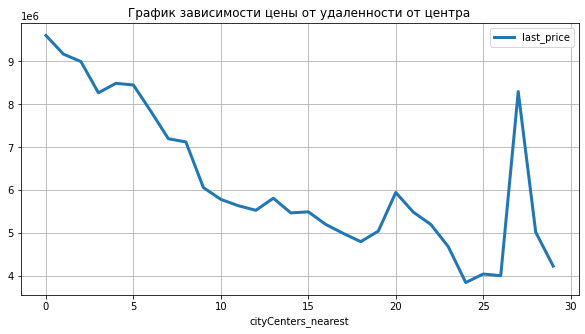

In [ ]:
spb_data.pivot_table(index='cityCenters_nearest', values='last_price', aggfunc='mean').plot(figsize=(10,5), grid=True, linewidth=3, title='График зависимости цены от удаленности от центра');

Как мы видим, цена уменьшается, но имеет два ярко выраженных пика на 20 км и на 26 км. Скорее всего это дорогие квартиры в престижных районах.

### Общий вывод

Мы провели анализ продажи квартир в Санкт-Петербурге и соседних населённых пунктах. Можем отметить, что было много пропусков и ошибок в данных, что отрицательно влияет на анализ данных. Необходимо обратить внимание разработчиков на найденные пропуски.

После предобработки данных и их анализа мы можем сделать следующие выводы:
1. наибольшее количество объявлений это двушки, площадью 50 м квадартных и ценой 4,5 млн
2. в среднем квартиры продаются за 93 дня
3. наблюдается определенная сезонность: много объявлений выкладывают в начале и конце года, в середине года наблюдается спад
4. рынок недвижимости рос с 2014 по 2018 год, в 2019 наблюдается спад
5. цена квартиры коррелирует с площадью 
6. с каждым годом увеличивается количество дней продажи квартиры
7. наиболее близкие с Санкт-Петербургу города не сильно отличаются от него ценой за квадратный метр
8. чем ближе к центру Санкт-Петербурга, тем дороже на, примерно, пол миллиона за 1 км